In [16]:
!pip install tensorflow


In [17]:
#importing the necessary modules for this project
!pip install prophet
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

from sklearn.metrics import mean_absolute_percentage_error,r2_score

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras import Sequential

#to suppress the warnings raised
import warnings
warnings.filterwarnings('ignore')

In [18]:
df = pd.read_csv("C:\\Users\\budat\\Desktop\\New folder\\Tetuan City power consumption.csv")

In [19]:
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,01-01-2017 00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,01-01-2017 00:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,01-01-2017 00:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,01-01-2017 00:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,01-01-2017 00:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [20]:
df.info() #Analyzing the overview of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DateTime                   52416 non-null  object 
 1   Temperature                52416 non-null  float64
 2   Humidity                   52416 non-null  float64
 3   Wind Speed                 52416 non-null  float64
 4   general diffuse flows      52416 non-null  float64
 5   diffuse flows              52416 non-null  float64
 6   Zone 1 Power Consumption   52416 non-null  float64
 7   Zone 2  Power Consumption  52416 non-null  float64
 8   Zone 3  Power Consumption  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [21]:
df.describe() #analyzing the summary of the data

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [22]:
df=df.iloc[lambda x:x.index%6==0] #picking the hourly consumption data

In [23]:
df['ds']=pd.to_datetime(df.pop('DateTime'),format='mixed') #converting the DataTime column to datetime datatype for further processing

In [24]:
df.set_index('ds',inplace=True) #setting the Datatime column as index for ease of plotting and slicing/shifting operations

In [25]:
plt.style.use('ggplot')

In [26]:
plt.rcParams['figure.figsize']=[10, 5]
plt.rcParams['font.size']=12
plt.rcParams['font.weight']='bold'
plt.rcParams['text.color']='black'
plt.rcParams['axes.titleweight']='bold'
plt.rcParams['font.sans-serif']='Times New Roman'
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['axes.labelsize']='medium'

#sns.set_palette('deep')


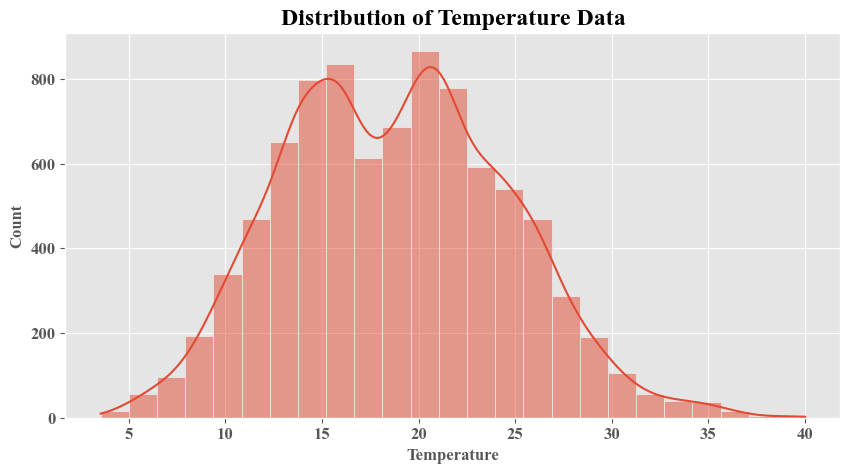

In [27]:
sns.histplot(data=df,x='Temperature',bins=25,kde=True)
plt.title('Distribution of Temperature Data')
plt.show()


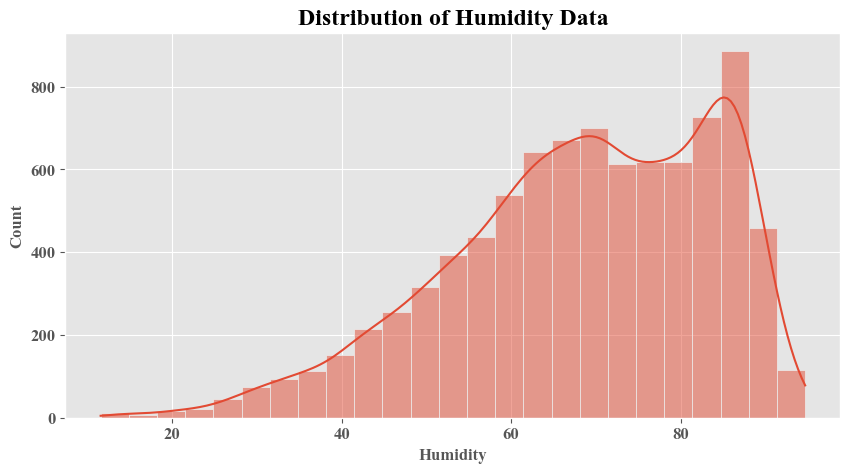

In [28]:
sns.histplot(data=df,x='Humidity',bins=25,kde=True)
plt.title('Distribution of Humidity Data')
plt.show()

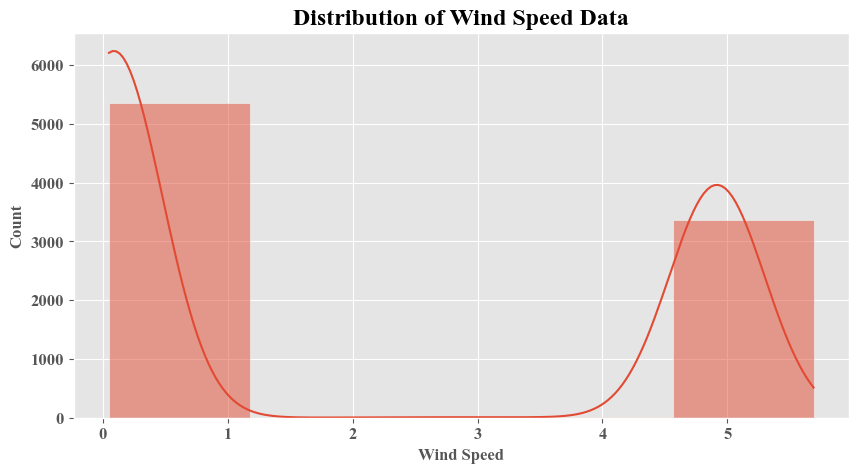

In [29]:
sns.histplot(data=df,x='Wind Speed',bins=5,kde=True)
plt.title('Distribution of Wind Speed Data')
plt.show()

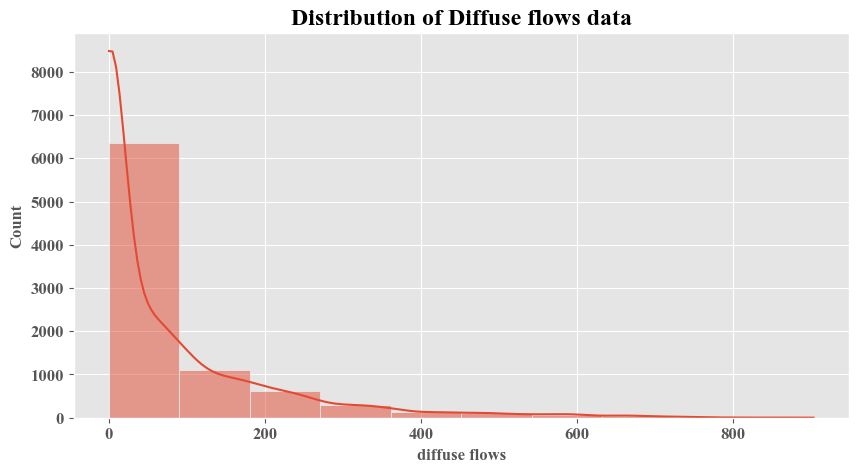

In [30]:
sns.histplot(data=df,x='diffuse flows',bins=10,kde=True)
plt.title('Distribution of Diffuse flows data')
plt.show()

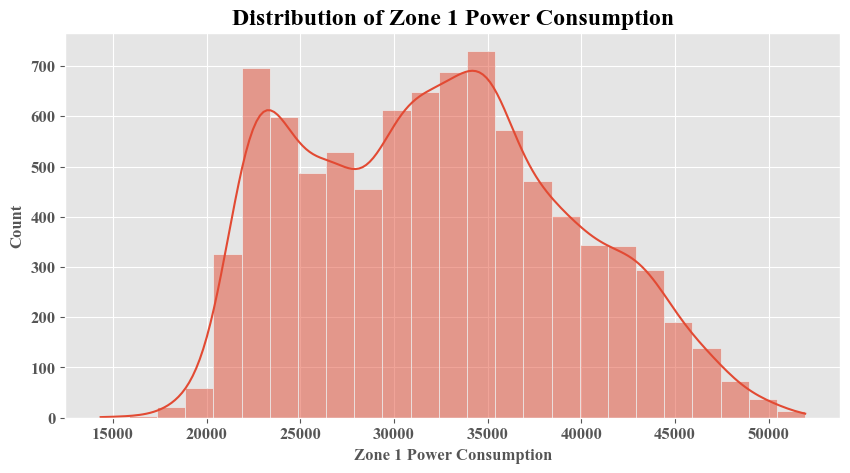

In [31]:
sns.histplot(data=df,x='Zone 1 Power Consumption',bins=25,kde=True)
plt.title('Distribution of Zone 1 Power Consumption')
plt.show()


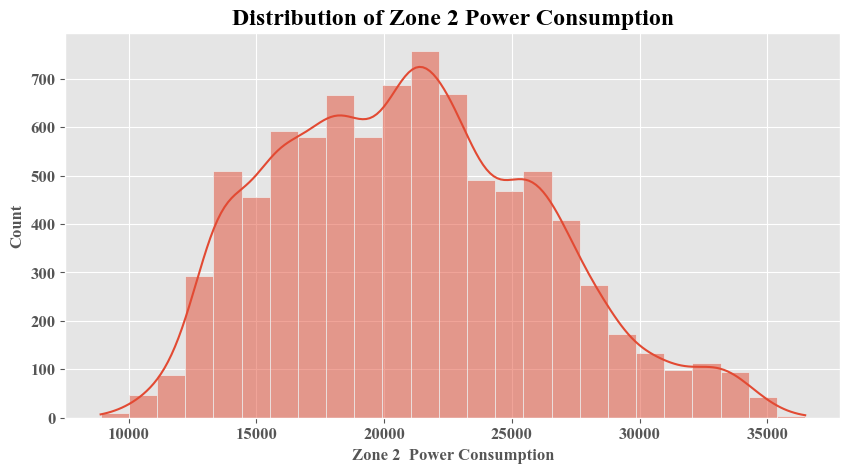

In [32]:
sns.histplot(data=df,x='Zone 2  Power Consumption',bins=25,kde=True)
plt.title('Distribution of Zone 2 Power Consumption')
plt.show()

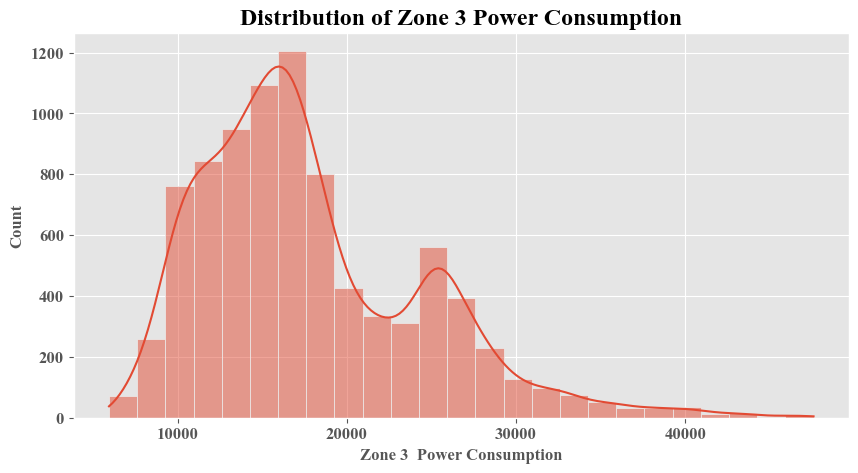

In [33]:
sns.histplot(data=df,x='Zone 3  Power Consumption',bins=25,kde=True)
plt.title('Distribution of Zone 3 Power Consumption')
plt.show()

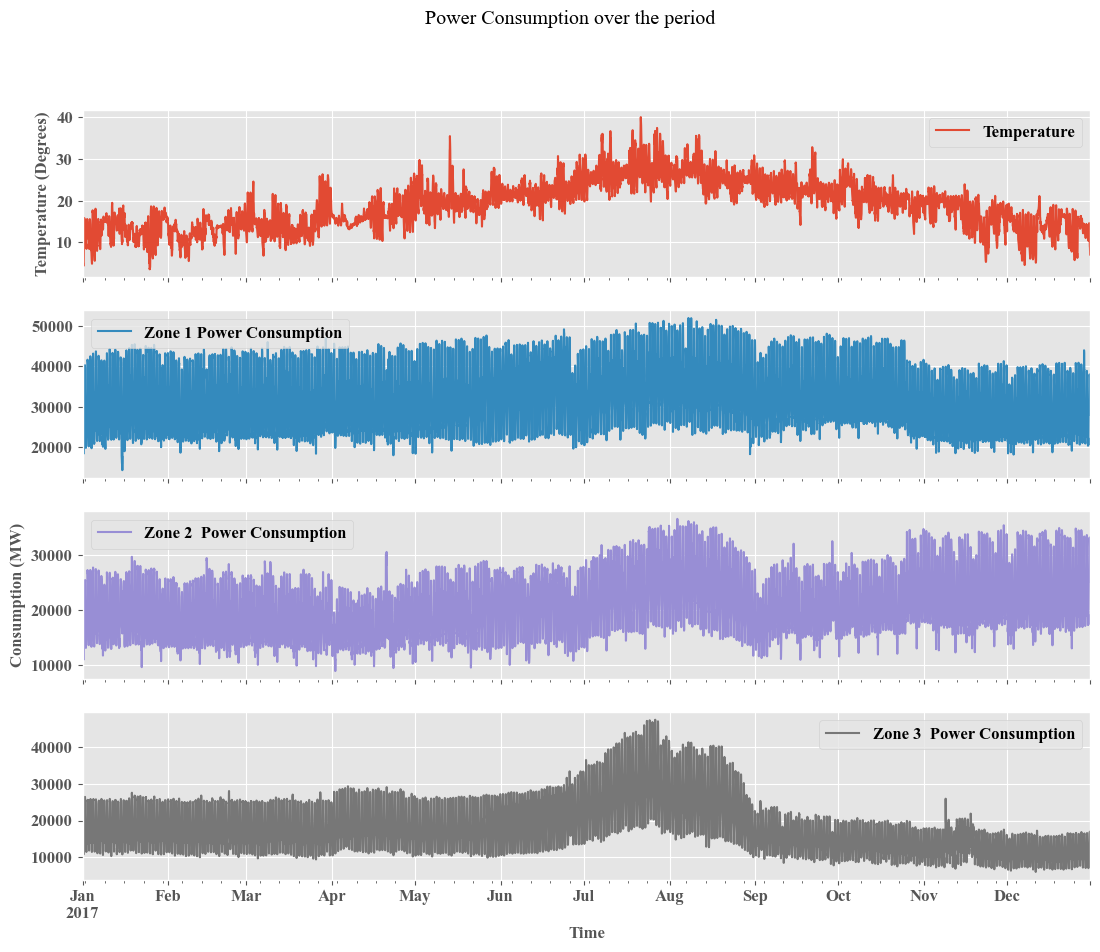

In [34]:
ax0,ax1,ax2,ax3=df[['Temperature','Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption']].plot(figsize=(13,10),subplots=True)
plt.xlabel('Time')
ax0.set_ylabel('Temperature (Degrees)')
ax2.set_ylabel('Consumption (MW)')
plt.suptitle('Power Consumption over the period')
plt.show()


In [35]:
df.isnull().sum()  #checking the number of null values in each column

Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
dtype: int64

In [36]:
df.duplicated().sum()


0

In [37]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows',
       'diffuse flows', 'Zone 1 Power Consumption',
       'Zone 2  Power Consumption', 'Zone 3  Power Consumption'],
      dtype='object')

In [38]:
df['Power Consumption']=df['Zone 1 Power Consumption']+df['Zone 2  Power Consumption']+df['Zone 3  Power Consumption'] #combining all three zone consumption data into a single target

In [39]:
df.reset_index(inplace=True) #resetting index to default

df=df[['ds','Power Consumption']] #selecting the required features alone

In [40]:
df.rename(columns={'Power Consumption':'y'},inplace=True) #renaming the columns

In [41]:
df_train=df.iloc[:int(df.shape[0]*0.8),:]
df_test=df.iloc[int(df.shape[0]*0.8):,:]  #splitting the data into train and test

In [42]:
df_train.shape

(6988, 2)

In [43]:
df_test.shape

(1748, 2)

In [44]:
p=Prophet() #initializing Prophet model object

In [45]:
p.fit(df) #fitting the model for training

11:24:56 - cmdstanpy - INFO - Chain [1] start processing
11:25:01 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
future=p.make_future_dataframe(periods=720,freq='H',include_history=False) #generating 720 hours of time index for prediction

In [47]:
forecast=p.predict(df_test['ds'].to_frame()) #predicting the test data

In [48]:
unseen=p.predict(future) #predicting the future unseen data

In [49]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-10-19 04:00:00,66979.866054,46542.207256,60353.415376,66979.866054,66979.866054,-13840.969567,-13840.969567,-13840.969567,-15646.322679,-15646.322679,-15646.322679,1805.353112,1805.353112,1805.353112,0.0,0.0,0.0,53138.896487
1,2017-10-19 05:00:00,66977.414283,42973.961085,57393.061952,66977.414283,66977.414283,-16956.593581,-16956.593581,-16956.593581,-18751.127826,-18751.127826,-18751.127826,1794.534245,1794.534245,1794.534245,0.0,0.0,0.0,50020.820702
2,2017-10-19 06:00:00,66974.962512,41269.806873,55092.303557,66974.962512,66974.962512,-19101.953125,-19101.953125,-19101.953125,-20876.583319,-20876.583319,-20876.583319,1774.630194,1774.630194,1774.630194,0.0,0.0,0.0,47873.009387
3,2017-10-19 07:00:00,66972.510741,41466.849155,55112.811494,66972.510741,66972.510741,-18589.055703,-18589.055703,-18589.055703,-20334.944015,-20334.944015,-20334.944015,1745.888312,1745.888312,1745.888312,0.0,0.0,0.0,48383.455038
4,2017-10-19 08:00:00,66970.058970,45058.773716,59318.082667,66970.058970,66970.058970,-14901.866847,-14901.866847,-14901.866847,-16610.533004,-16610.533004,-16610.533004,1708.666157,1708.666157,1708.666157,0.0,0.0,0.0,52068.192123


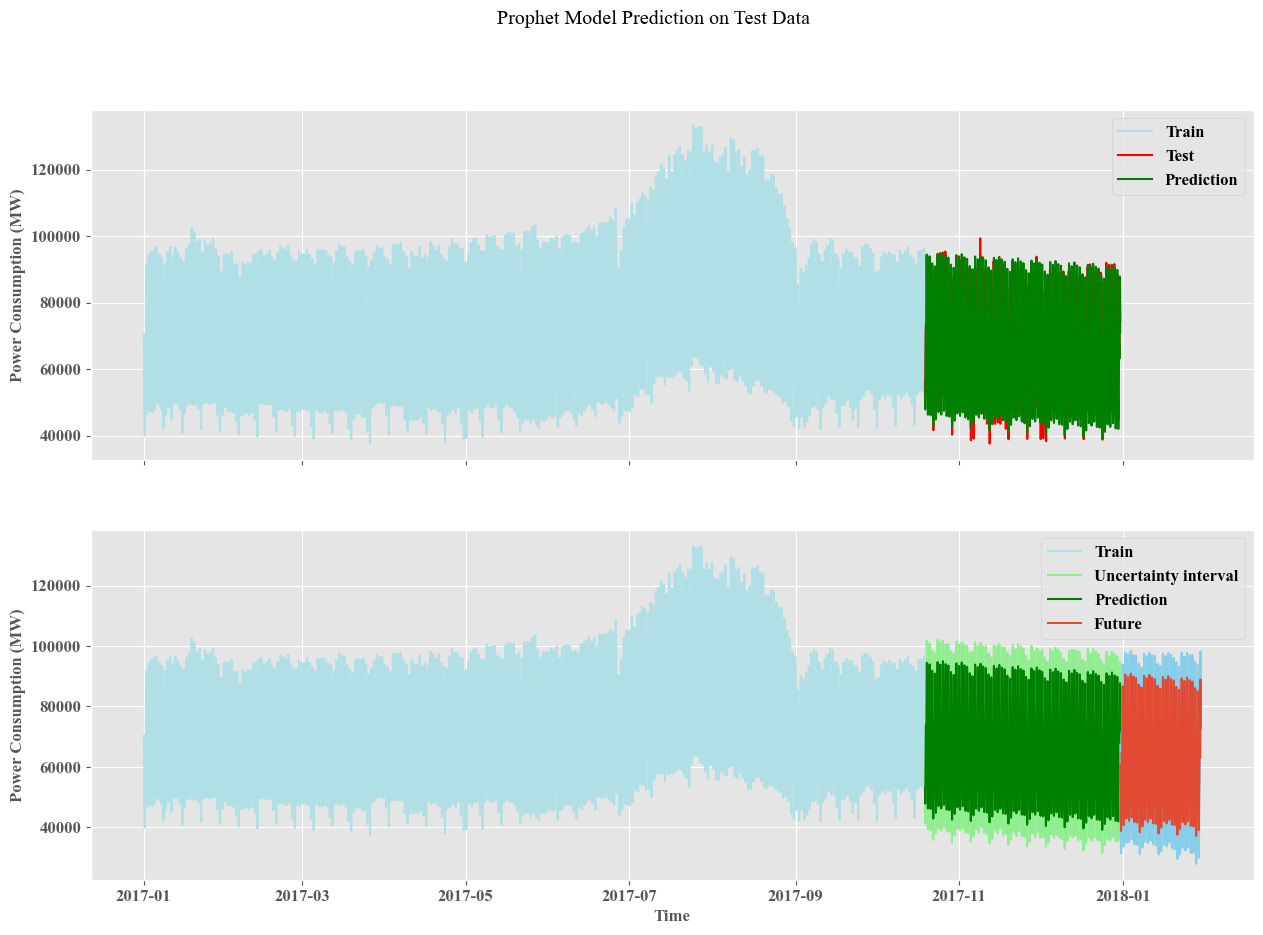

In [50]:
fig,ax=plt.subplots(2,1,figsize=(15,10),sharex=True)
ax[0].plot(df_train['ds'],df_train['y'],label='Train',color='powderblue')
ax[0].plot(df_test['ds'],df_test['y'],label='Test',color='red')
ax[0].plot(forecast['ds'],forecast['yhat'],label='Prediction',color='green')
ax[0].legend()
ax[0].set_ylabel('Power Consumption (MW)')


ax[1].plot(df_train['ds'],df_train['y'],label='Train',color='powderblue')
ax[1].plot(forecast['ds'],forecast['yhat_lower'],color='lightgreen',label='Uncertainty interval')
ax[1].plot(forecast['ds'],forecast['yhat_upper'],color='lightgreen')
ax[1].plot(forecast['ds'],forecast['yhat'],label='Prediction',color='green')
ax[1].plot(unseen['ds'],unseen['yhat_lower'],color='skyblue')
ax[1].plot(unseen['ds'],unseen['yhat_upper'],color='skyblue')
ax[1].plot(unseen['ds'],unseen['yhat'],label='Future')
ax[1].legend()
ax[1].set_ylabel('Power Consumption (MW)')
plt.suptitle('Prophet Model Prediction on Test Data')
plt.xlabel('Time')
plt.show()


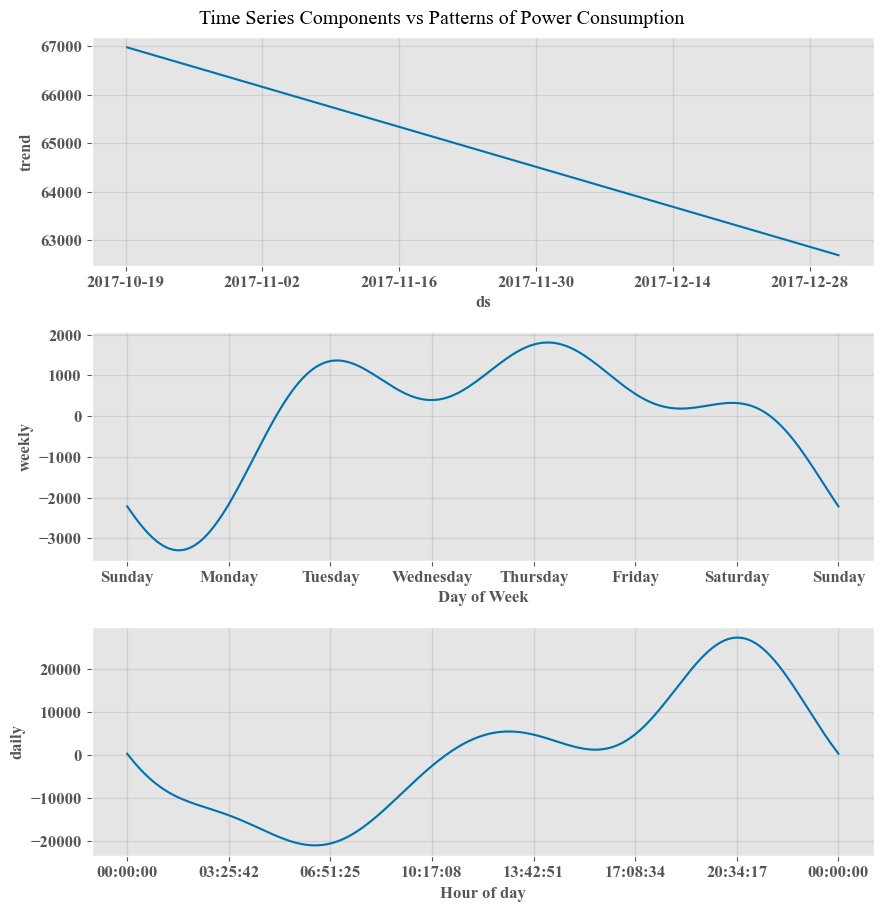

In [51]:
figure=p.plot_components(forecast)
figure.suptitle('Time Series Components vs Patterns of Power Consumption',y=0.995,va='baseline')
plt.show()

In [52]:
# splitting half of the test data for validation
data_val=df_test.iloc[:int(df_test.shape[0]*0.5)]
data_test=df_test.iloc[int(df_test.shape[0]*0.5):]

In [53]:
data_train=df_train.copy()

In [54]:
#function to create time lag components from the data
def data_shifter(data):
    data.set_index('ds',inplace=True)
    for i in range(1,6):
        data[f'y-{i}']=data['y'].shift(i,freq='H')
    return data

In [55]:
#dropping rows which has null values because of shifting
data_train_featured=data_shifter(data_train).dropna()

data_val_featured=data_shifter(data_val).dropna()

data_test_featured=data_shifter(data_test).dropna()

In [56]:
data_train_featured.shape,data_val_featured.shape,data_test_featured.shape #verifying # of observations in each split

((6983, 6), (869, 6), (869, 6))

In [57]:
#scaling data between the range of 0 to 1
scaler=MinMaxScaler()
dtf=scaler.fit_transform(data_train_featured)

dvf=scaler.transform(data_val_featured)

dtef=scaler.transform(data_test_featured)

In [58]:
tf.random.set_seed(1234)

In [59]:
#constructing a LSTM RNN model
model=Sequential()
model.add(layers.InputLayer((5,1)))
model.add(layers.LSTM(units=128,return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(units=128,return_sequences=False))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1))

In [60]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 128)         │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 198,273 (774.50 KB)

 Trainable params: 198,273 (774.50 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# Compile the model structure with optimizers, loss, and metrics parameters
model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
              loss='mean_squared_error',  # You can also use 'mse'
              metrics=['mean_squared_error'])  # Use 'mse' as a shorthand


In [62]:
#setting a earlystopping callback to stop the training when the loss is not varying much
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3)

In [63]:
#training the model with input data
model.fit(dtf[:,1:6],dtf[:,0],validation_data=(dvf[:,1:6],
          dvf[:,0]),epochs=15,callbacks=[early_stop])

Epoch 1/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0287 - mean_squared_error: 0.0287 - val_loss: 0.0053 - val_mean_squared_error: 0.0053
Epoch 2/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0072 - mean_squared_error: 0.0072 - val_loss: 0.0049 - val_mean_squared_error: 0.0049
Epoch 3/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0045 - val_mean_squared_error: 0.0045
Epoch 4/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0041 - val_mean_squared_error: 0.0041
Epoch 5/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0052 - mean_squared_error: 0.0052 - val_loss: 0.0046 - val_mean_squared_error: 0.0046
Epoch 6/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0037 - val_mean_squared_error: 0.0037
Epoch 7/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss:

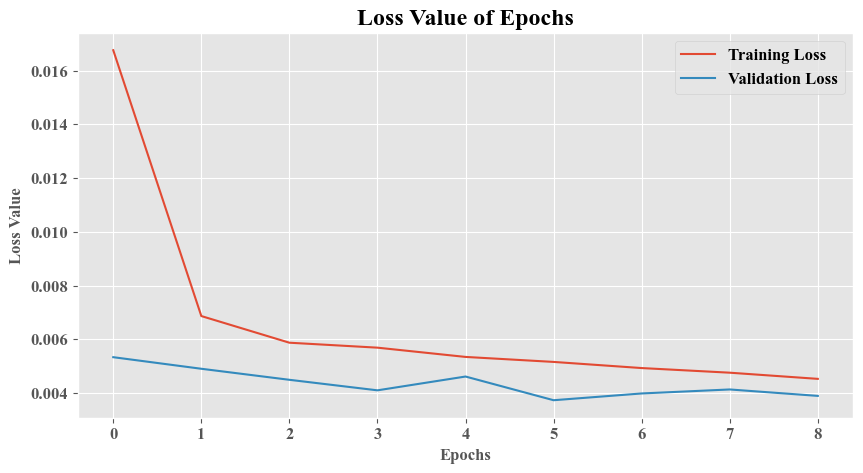

In [64]:
#plotting the Training and Validation loss terms
plt.plot(list(range(len(model.history.history['loss']))),model.history.history['loss'],label='Training Loss')
plt.plot(list(range(len(model.history.history['loss']))),model.history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.title('Loss Value of Epochs')
plt.legend()
plt.show()


In [65]:
#predicting the test data with trained model
y_hat=model.predict(dtef[:,1:6],verbose=0)

In [66]:
#function to inverse the scaled data to its actual values
def inv_transform(data):
    return (data*(scaler.data_max_[0]-scaler.data_min_[0]))+scaler.data_min_[0]

In [67]:
y_hat_reversed=inv_transform(y_hat.flatten())

y_true_reversed=inv_transform(dtef[:,0])

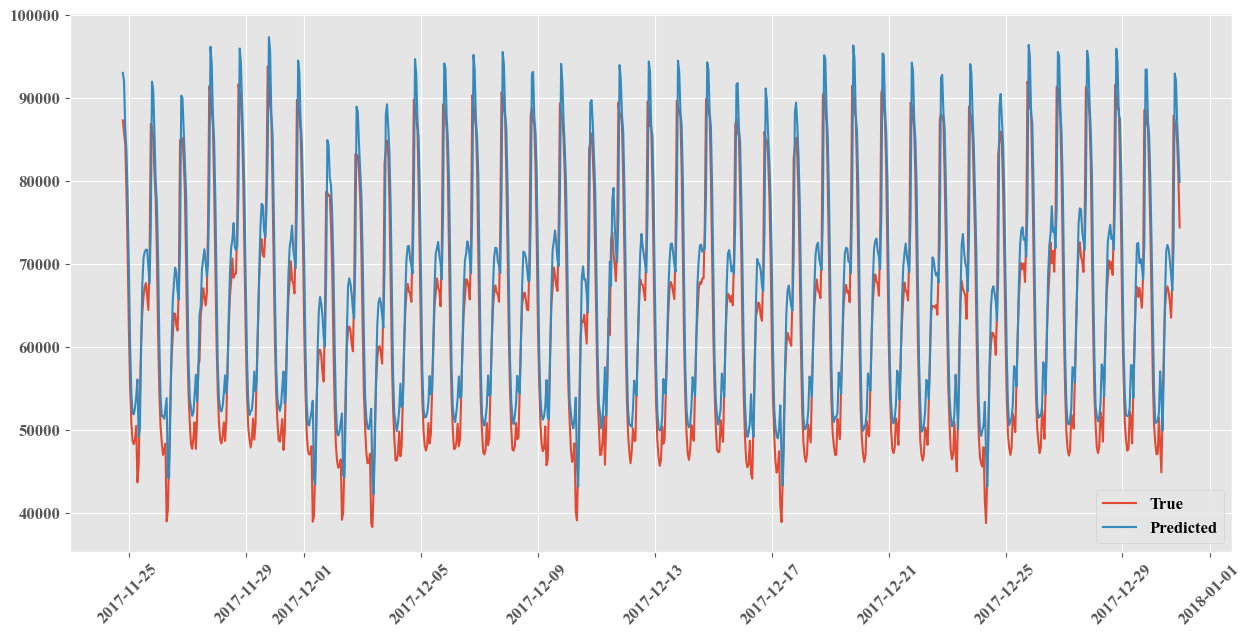

In [68]:
#plotting the True values of Target and Predicted values
plt.figure(figsize=(15,7))
plt.plot(data_test_featured.index,y_true_reversed,label='True')
plt.plot(data_test_featured.index,y_hat_reversed,label='Predicted')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [69]:
#function to generate future datapoints from the predictions
def future_predictions(num,start=dtef[-1,1:6].reshape(1,-1)):
    result=[]
    future_pred=pd.DataFrame()
    for i in range(num):
        pred=model.predict(start,verbose=0)[0][0]
        result.append(pred)
        start=start.flatten().tolist()
        future_pred[i]=start
        start.append(pred)
        start.pop(0)
        start=np.array(start).reshape(1,-1)
    future_pred=future_pred.T
    future_pred[5]=result
    return future_pred

In [70]:
fp=future_predictions(24)

fp[5]=inv_transform(fp[5])

fp.index=pd.date_range(start='2017-12-30 23:00:00',periods=24,freq='H')

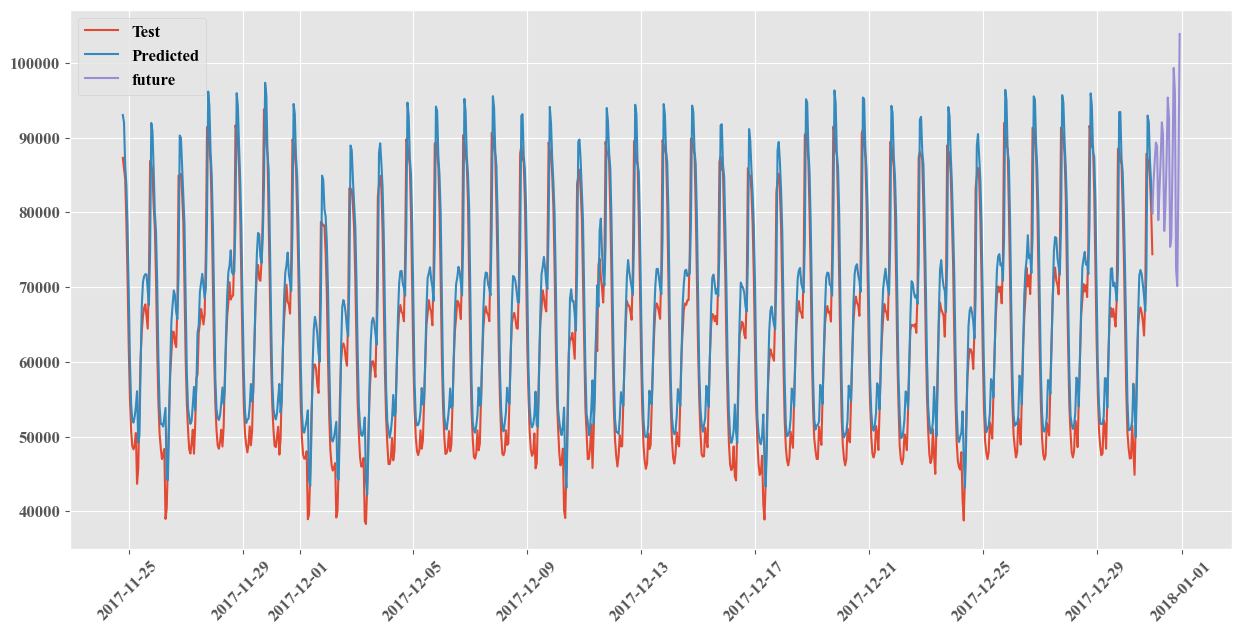

In [71]:
#plotting the future data points and predictions with existing data points
plt.figure(figsize=(15,7))
plt.plot(data_test_featured.index,y_true_reversed,label='Test')
plt.plot(data_test_featured.index,y_hat_reversed,label='Predicted')
plt.plot(fp.index,fp[5],label='future')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [72]:
print(f"Prophet Model: \nMean Absolute Percentage Error: {mean_absolute_percentage_error(df_test['y'],forecast['yhat']):.2%}")

print(f"Accuracy Score: {r2_score(df_test['y'],forecast['yhat']):.2%}")

Prophet Model: 
Mean Absolute Percentage Error: 5.77%
Accuracy Score: 87.86%


In [73]:
print(f"LSTM Model: \nMean Absolute Percentage Error: {mean_absolute_percentage_error(y_true_reversed,y_hat_reversed):.2%}")

print(f"Accuracy Score: {r2_score(y_true_reversed,y_hat_reversed):.2%}")

LSTM Model: 
Mean Absolute Percentage Error: 7.59%
Accuracy Score: 84.87%
